# Phase 5 Project Submission
* Student Name: Alec Schonfeld
* Student pace: self paced
* Instructor name: Mark

---

# Busness Understanding

This project analyzes the price history of 20 major cryptocurrency assets to provide institutional clients with actionable insights for developing a data-driven investment thesis. By uncovering trends, correlations, and key price drivers, the analysis aims to support informed trading strategies tailored to the unique dynamics of the crypto market. This comprehensive approach enables institutional stakeholders to optimize portfolio allocation, manage risk effectively, and identify high-value opportunities in a rapidly evolving asset class.

---

# Data Understanding 

- The dataset is from Kaggle and has data from  2010-07-17 till 2024-12-09.
- There are individual CSV files for each asset with data on the ticket, date, price at open, price at close, low, and high
- This data enables us to conduct thoroguh time-series analysis of each of the 20 assets we will be evaluating
- The tickets we chose are based on market cap, volume, and popularity amongst the industry

---

# Data Preparation

In [114]:
# Import necessary packages
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import RandomizedSearchCV
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller


%matplotlib inline

plt.style.use('seaborn-v0_8-darkgrid')

In [115]:
# Load and import datasets

folder_path = 'price_data'  # Replace with your folder path
all_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')]

dataframes = []
for file in all_files:
    df = pd.read_csv(file)
    dataframes.append(df)

combined_data = pd.concat(dataframes, ignore_index=True)


In [116]:
# print the head

print(combined_data.head())

  ticker        date   open   high    low  close
0   AAVE  2020-10-10  51.08  51.08  51.08  51.08
1   AAVE  2020-10-11  51.08  51.08  51.08  51.08
2   AAVE  2020-10-12  51.08  52.40  48.34  51.42
3   AAVE  2020-10-13  51.42  53.04  49.76  51.60
4   AAVE  2020-10-14  51.60  57.02  51.60  52.59


In [117]:
# datset info 

combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47492 entries, 0 to 47491
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ticker  47492 non-null  object 
 1   date    47492 non-null  object 
 2   open    47492 non-null  float64
 3   high    47492 non-null  float64
 4   low     47492 non-null  float64
 5   close   47492 non-null  float64
dtypes: float64(4), object(2)
memory usage: 2.2+ MB


In [118]:
# Convert date column to datetime 

combined_data['date'] = pd.to_datetime(combined_data['date'])


In [119]:
# Describe the dataset

combined_data.describe()

date           open           high  \
count                          47492   47492.000000   47492.000000   
mean   2021-01-20 22:13:08.949717760    1621.222231    1661.023569   
min              2010-07-17 00:00:00       0.000006       0.000006   
25%              2019-06-23 00:00:00       0.523914       0.543297   
50%              2021-08-27 00:00:00       7.580815       7.890510   
75%              2023-04-26 00:00:00      86.356125      90.092275   
max              2024-12-09 00:00:00  100648.000000  104062.000000   
std                              NaN    7872.142477    8054.733691   

                low          close  
count  47492.000000   47492.000000  
mean    1579.450527    1623.409762  
min        0.000005       0.000006  
25%        0.506474       0.523937  
50%        7.269490       7.589000  
75%       83.085175      86.474550  
max    99087.600000  100648.000000  
std     7683.818003    7884.486009

In [120]:
# Check dataset shape

combined_data.shape

(47492, 6)

In [121]:
# Check for missing values

print(combined_data.isnull().sum())


ticker    0
date      0
open      0
high      0
low       0
close     0
dtype: int64


There is no missing values

In [122]:
# List all the assets we are looking at 

print(combined_data['ticker'].value_counts())

ticker
BTC      5260
LTC      4063
XRP      3608
ETH      3413
DOGE     3084
BNB      2650
LINK     2628
ADA      2537
FIL      2483
MATIC    2051
ATOM     2050
ALGO     1989
SOL      1705
COMP     1635
UNI      1545
AVAX     1539
AAVE     1522
NEAR     1517
SHIB     1267
LDO       946
Name: count, dtype: int64


We can visualize the 20 tickers as well as how long they have been trading for based on the count of rows for each

# Asset Analysis and Insights

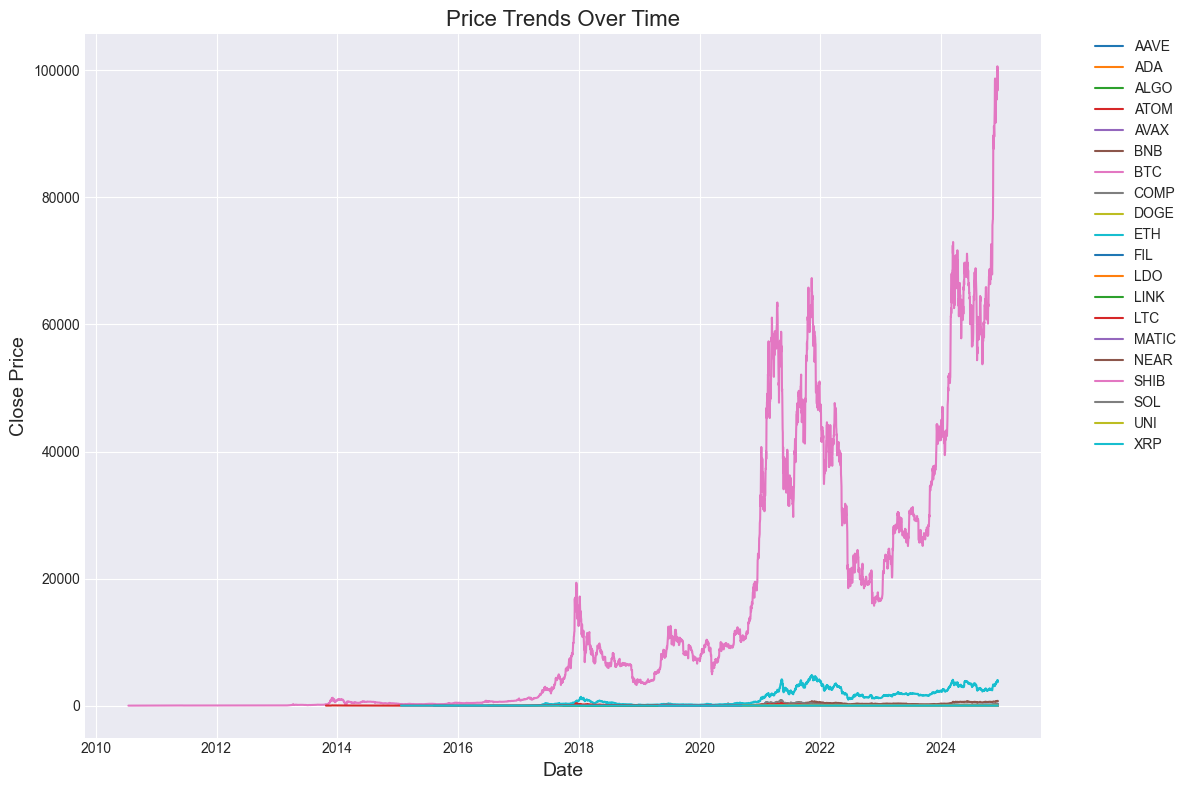

In [123]:
# Visualize the price trends over time


# Set figure size to make the graph larger
plt.figure(figsize=(12, 8))  # Adjust width and height as needed

for ticker in combined_data['ticker'].unique():
    asset_data = combined_data[combined_data['ticker'] == ticker]
    plt.plot(asset_data['date'], asset_data['close'], label=ticker)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price', fontsize=14)
plt.title('Price Trends Over Time', fontsize=16)

# Configure the legend to fit properly
plt.legend(loc='best', fontsize=10, bbox_to_anchor=(1.05, 1), borderaxespad=0.)  # Adjust bbox_to_anchor if needed

# Add grid for better readability
plt.grid(True)

# Display the plot
plt.tight_layout()  # Ensures all elements fit within the figure
plt.show()


In [124]:
# Interactive visualization

import plotly.express as px

fig = px.line(combined_data, x='date', y='close', color='ticker', title='Price Trends Over Time')
fig.update_yaxes(type='log')  # Optionally use a logarithmic scale
fig.show()


C:\Users\alecs\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

C:\Users\alecs\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [125]:
# Add new columns to capture key stats such as daily returns and moving average 

combined_data['daily_return'] = combined_data.groupby('ticker')['close'].pct_change()

combined_data['7_day_MA'] = combined_data.groupby('ticker')['close'].transform(lambda x: x.rolling(7).mean())

combined_data['30_day_MA'] = combined_data.groupby('ticker')['close'].transform(lambda x: x.rolling(30).mean())


In [126]:
combined_data.head()

ticker       date   open   high    low  close  daily_return  7_day_MA  \
0   AAVE 2020-10-10  51.08  51.08  51.08  51.08           NaN       NaN   
1   AAVE 2020-10-11  51.08  51.08  51.08  51.08      0.000000       NaN   
2   AAVE 2020-10-12  51.08  52.40  48.34  51.42      0.006656       NaN   
3   AAVE 2020-10-13  51.42  53.04  49.76  51.60      0.003501       NaN   
4   AAVE 2020-10-14  51.60  57.02  51.60  52.59      0.019186       NaN   

   30_day_MA  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN

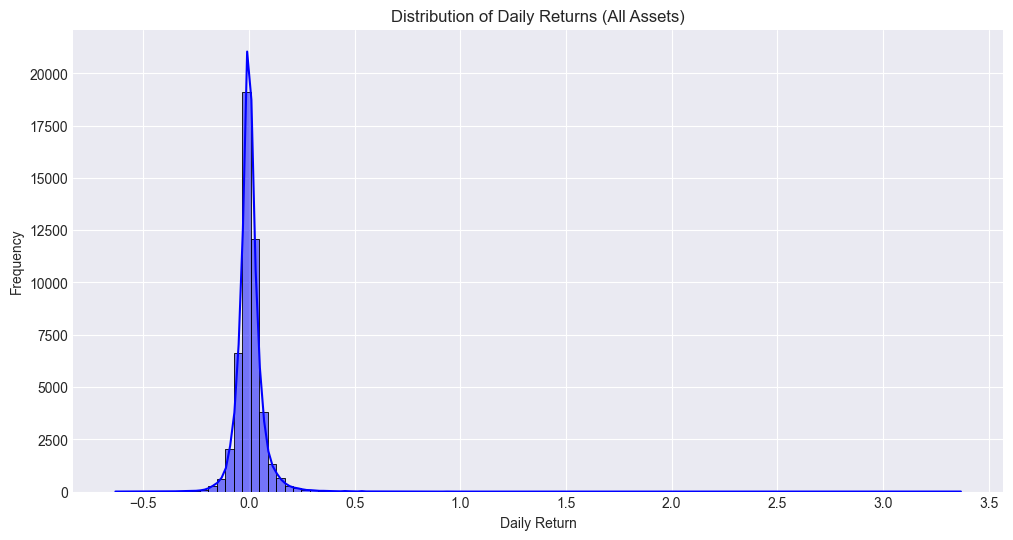

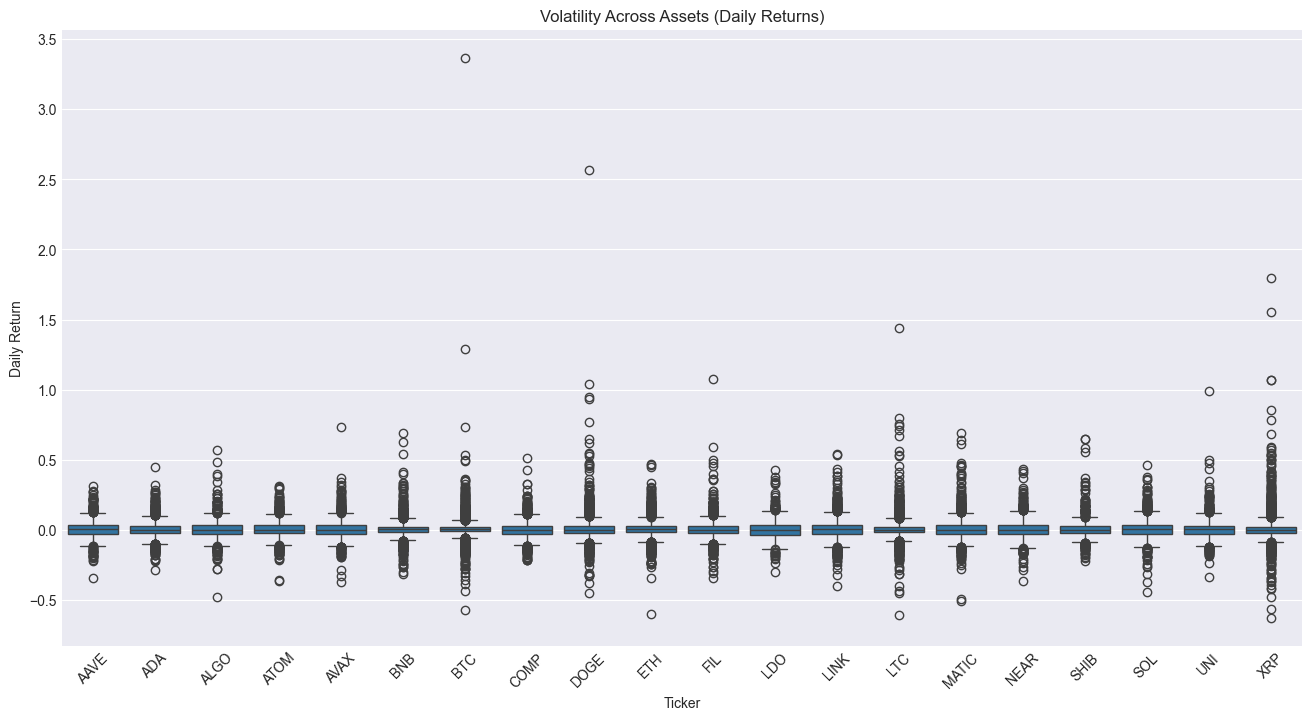

In [127]:
# Lets analyze and visual daily returns 

import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram of daily returns for a single asset or aggregated
plt.figure(figsize=(12, 6))
sns.histplot(combined_data['daily_return'], bins=100, kde=True, color='blue')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.title('Distribution of Daily Returns (All Assets)')
plt.show()

# Optional: Boxplot grouped by assets
plt.figure(figsize=(16, 8))
sns.boxplot(data=combined_data, x='ticker', y='daily_return')
plt.xlabel('Ticker')
plt.ylabel('Daily Return')
plt.title('Volatility Across Assets (Daily Returns)')
plt.xticks(rotation=45)
plt.show()


In [128]:
# Evaluate risk return summary for each asset 

risk_return_summary = combined_data.groupby('ticker')['daily_return'].agg(['mean', 'std'])
risk_return_summary['risk_to_return'] = risk_return_summary['std'] / risk_return_summary['mean']
print(risk_return_summary)


            mean       std  risk_to_return
ticker                                    
AAVE    0.002822  0.059637       21.129761
ADA     0.001668  0.054410       32.628610
ALGO    0.001215  0.060696       49.937332
ATOM    0.001886  0.056294       29.850785
AVAX    0.003424  0.064961       18.973297
BNB     0.003995  0.056965       14.258970
BTC     0.004522  0.071440       15.798234
COMP    0.001303  0.060706       46.596178
DOGE    0.005201  0.087283       16.782634
ETH     0.003721  0.056926       15.300102
FIL     0.001353  0.062851       46.444012
LDO     0.002077  0.068035       32.751595
LINK    0.003822  0.065715       17.192016
LTC     0.002917  0.066976       22.962407
MATIC   0.004975  0.074169       14.907158
NEAR    0.003369  0.067237       19.955565
SHIB    0.003149  0.066087       20.988080
SOL     0.005475  0.067909       12.402863
UNI     0.003010  0.066835       22.207521
XRP     0.004808  0.090345       18.788738


Risk-to-Return table takeaway

Top Assets with Good Risk-Adjusted Returns:

- SOL, BTC, MATIC, and ETH have relatively low risk-to-return ratios, indicating they offer better returns per unit of risk.
- These assets could be considered "safer" relative to others in the cryptocurrency space.

High Volatility Assets:

- XRP and DOGE show high standard deviations, indicating significant price swings. While they may provide higher returns on some days, they are riskier investments.

Low Average Return Assets:

- ALGO and FIL have low average daily returns and high risk-to-return ratios, making them less attractive compared to other assets.

Diversification Opportunity:

- By analyzing these metrics across multiple assets, you can identify combinations of low-risk and high-growth cryptocurrencies to optimize a portfolio.


In [129]:
# Rolling volatility (30-day std of daily returns)
combined_data['rolling_volatility'] = combined_data.groupby('ticker')['daily_return'].transform(lambda x: x.rolling(30).std())


In [130]:
combined_data.head()

ticker       date   open   high    low  close  daily_return  7_day_MA  \
0   AAVE 2020-10-10  51.08  51.08  51.08  51.08           NaN       NaN   
1   AAVE 2020-10-11  51.08  51.08  51.08  51.08      0.000000       NaN   
2   AAVE 2020-10-12  51.08  52.40  48.34  51.42      0.006656       NaN   
3   AAVE 2020-10-13  51.42  53.04  49.76  51.60      0.003501       NaN   
4   AAVE 2020-10-14  51.60  57.02  51.60  52.59      0.019186       NaN   

   30_day_MA  rolling_volatility  
0        NaN                 NaN  
1        NaN                 NaN  
2        NaN                 NaN  
3        NaN                 NaN  
4        NaN                 NaN

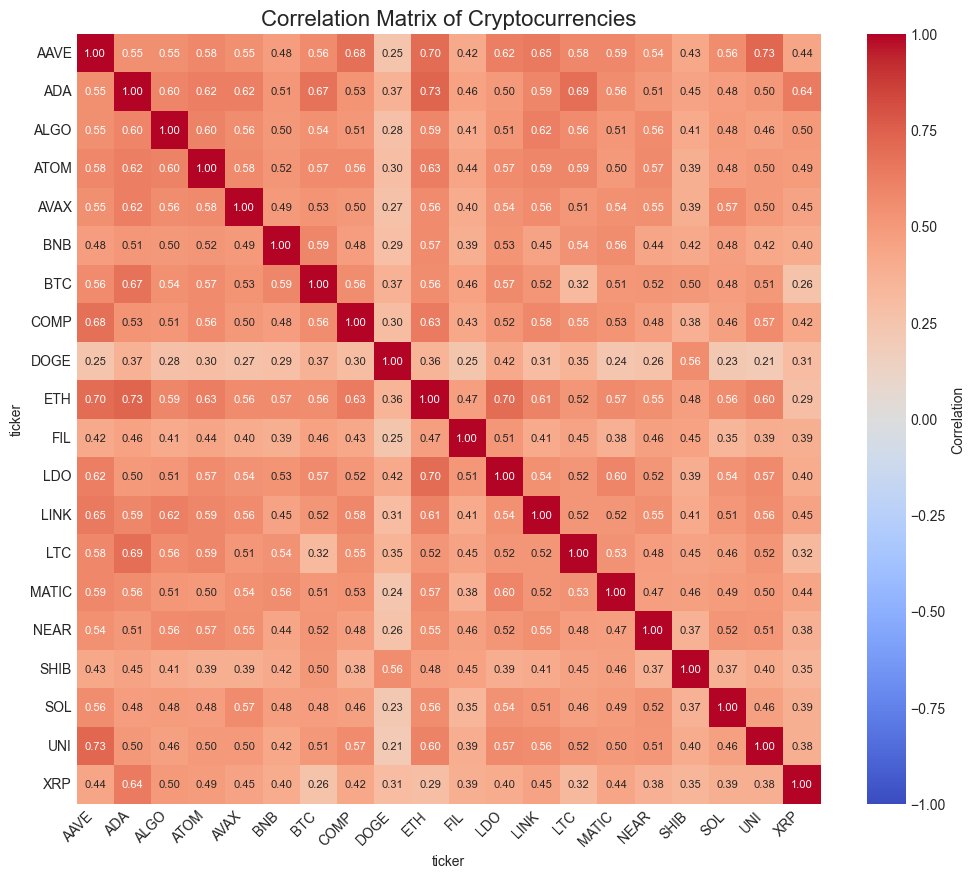

In [131]:
# Visualize a correlation matrix between these assets
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
            cbar_kws={'label': 'Correlation'}, vmin=-1, vmax=1,
            annot_kws={"size": 8})
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title("Correlation Matrix of Cryptocurrencies", fontsize=16)
plt.show()


Correlation Matrix Takeaways



High Correlation Among Major Assets: Cryptos like BTC, ETH, and ADA exhibit strong correlations, reflecting shared market dynamics and reducing diversification benefits when held together.

Low-Correlation Opportunities: Assets like DOGE and XRP show weaker correlations, making them valuable for portfolio diversification.

Clustered Behavior: Cryptos from similar sectors (e.g., DeFi tokens like AAVE, COMP) tend to move together, highlighting sector-driven trends.

Market Cohesion: The overall positive correlations indicate the crypto market behaves as a single asset class, heavily influenced by macro trends.

Diversification Strategy: Combining low-correlation assets with highly correlated clusters can improve portfolio performance and manage risk.

# Momentum Analysis

C:\Users\alecs\AppData\Local\Temp\ipykernel_22668\261684759.py:9: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



  ticker       date   open   high    low  close  daily_return  7_day_MA  \
0   AAVE 2020-10-10  51.08  51.08  51.08  51.08           NaN       NaN   
1   AAVE 2020-10-11  51.08  51.08  51.08  51.08      0.000000       NaN   
2   AAVE 2020-10-12  51.08  52.40  48.34  51.42      0.006656       NaN   
3   AAVE 2020-10-13  51.42  53.04  49.76  51.60      0.003501       NaN   
4   AAVE 2020-10-14  51.60  57.02  51.60  52.59      0.019186       NaN   

   30_day_MA  rolling_volatility  signal  
0        NaN                 NaN       0  
1        NaN                 NaN       0  
2        NaN                 NaN       0  
3        NaN                 NaN       0  
4        NaN                 NaN       0  
Index(['ticker', 'date', 'open', 'high', 'low', 'close', 'daily_return',
       '7_day_MA', '30_day_MA', 'rolling_volatility', 'signal'],
      dtype='object')


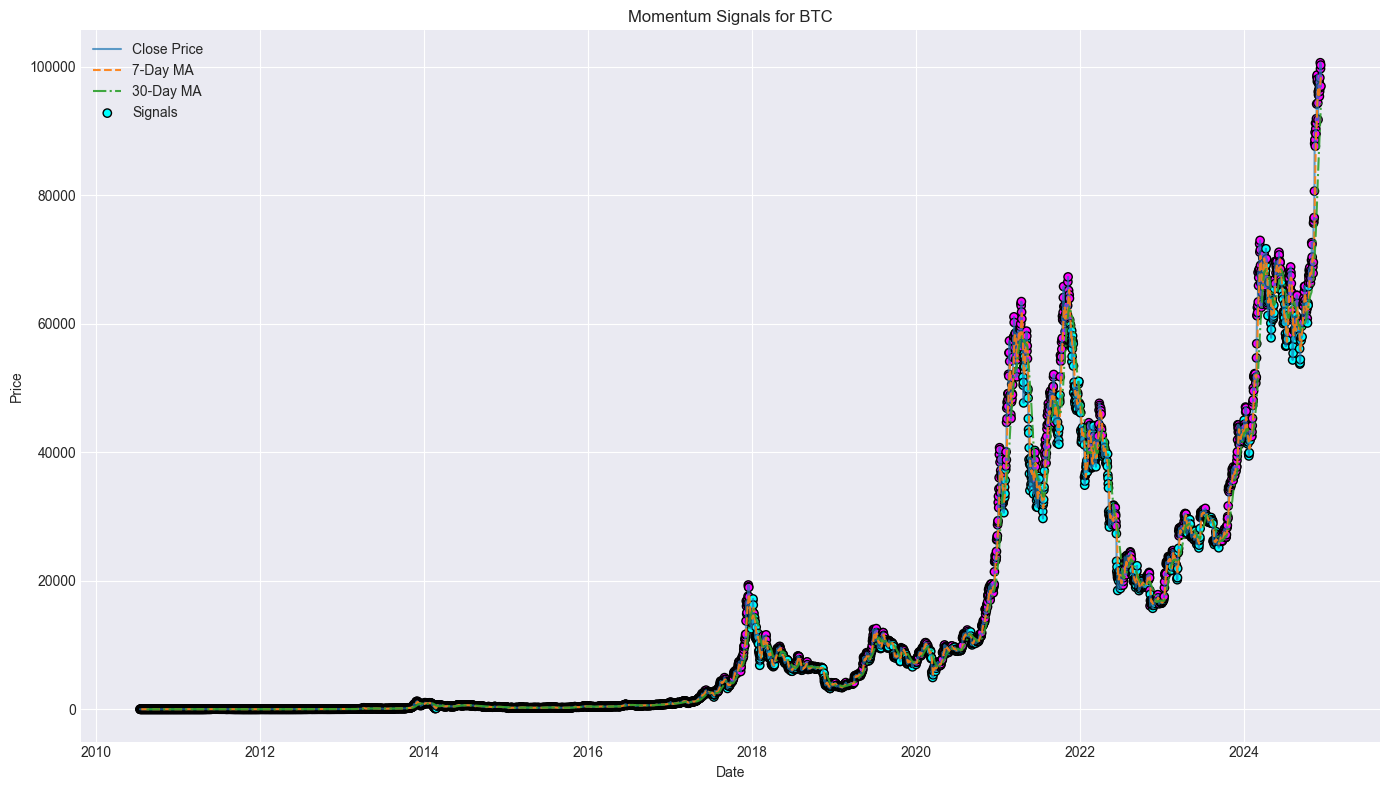

In [132]:
# Step 1: Define the signal calculation function
def calculate_signals(data):
    # Add a 'signal' column: 1 for buy, 0 for sell
    data['signal'] = 0
    data['signal'] = (data['7_day_MA'] > data['30_day_MA']).astype(int)
    return data

# Step 2: Apply the function group-wise and reset the index
combined_data = combined_data.groupby('ticker').apply(calculate_signals).reset_index(drop=True)

# Step 3: Verify the structure of the DataFrame
print(combined_data.head())  # Ensure the index is flat and 'ticker' is a column
print(combined_data.columns)  # Check for correct columns

# Step 4: Filter the data for a specific asset (e.g., BTC)
asset = 'BTC'
asset_data = combined_data[combined_data['ticker'] == asset]

# Step 5: Plot the momentum analysis
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.plot(asset_data['date'], asset_data['close'], label='Close Price', alpha=0.7)
plt.plot(asset_data['date'], asset_data['7_day_MA'], label='7-Day MA', linestyle='--', alpha=0.9)
plt.plot(asset_data['date'], asset_data['30_day_MA'], label='30-Day MA', linestyle='-.', alpha=0.9)

# Highlight buy and sell signals
plt.scatter(
    asset_data['date'], 
    asset_data['close'], 
    c=asset_data['signal'], 
    cmap='cool', 
    label='Signals', 
    edgecolor='black'
)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'Momentum Signals for {asset}')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


In [133]:
combined_data.head()

ticker       date   open   high    low  close  daily_return  7_day_MA  \
0   AAVE 2020-10-10  51.08  51.08  51.08  51.08           NaN       NaN   
1   AAVE 2020-10-11  51.08  51.08  51.08  51.08      0.000000       NaN   
2   AAVE 2020-10-12  51.08  52.40  48.34  51.42      0.006656       NaN   
3   AAVE 2020-10-13  51.42  53.04  49.76  51.60      0.003501       NaN   
4   AAVE 2020-10-14  51.60  57.02  51.60  52.59      0.019186       NaN   

   30_day_MA  rolling_volatility  signal  
0        NaN                 NaN       0  
1        NaN                 NaN       0  
2        NaN                 NaN       0  
3        NaN                 NaN       0  
4        NaN                 NaN       0

# Seasonality Analysis


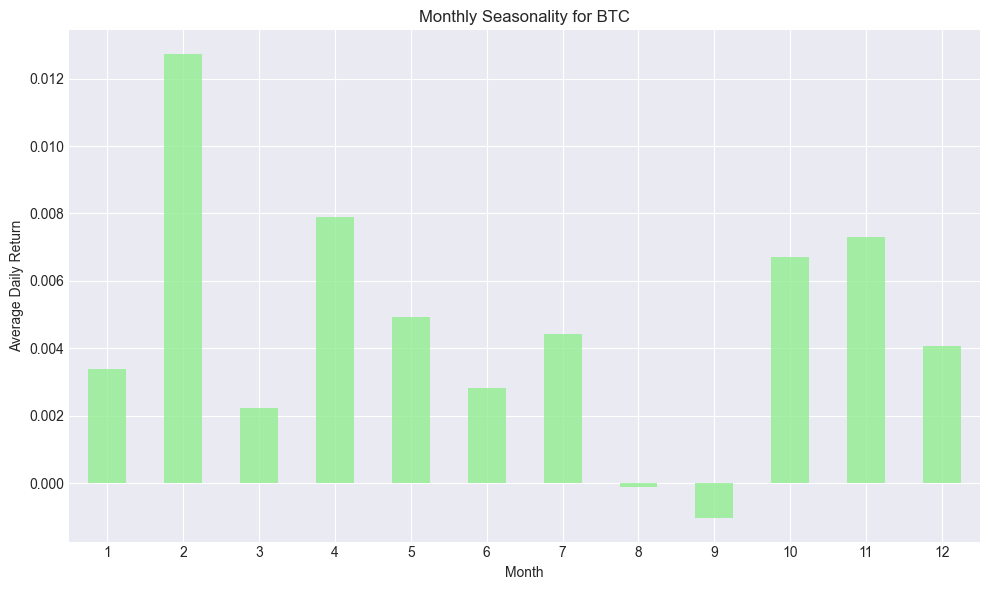

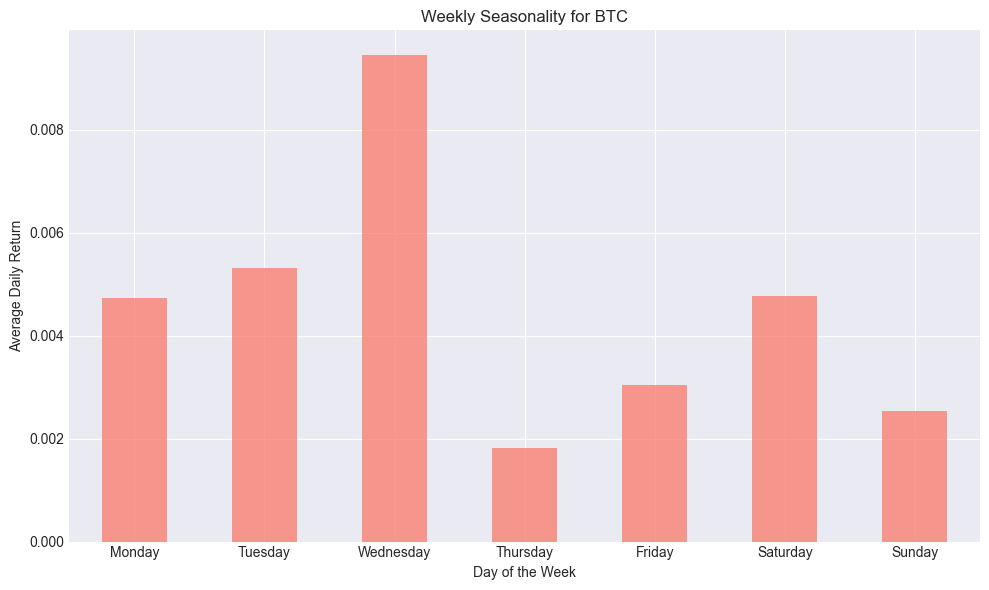

In [134]:
# Add time-based features
combined_data['month'] = combined_data['date'].dt.month
combined_data['day_of_week'] = combined_data['date'].dt.day_name()

# Average monthly returns
monthly_returns = combined_data.groupby(['ticker', 'month'])['daily_return'].mean().unstack()

# Plot average monthly returns for a single asset
asset = 'BTC'
monthly_returns.loc[asset].plot(kind='bar', figsize=(10, 6), color='lightgreen', alpha=0.8)
plt.xlabel('Month')
plt.ylabel('Average Daily Return')
plt.title(f'Monthly Seasonality for {asset}')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

# Average daily returns by day of the week
weekday_returns = combined_data.groupby(['ticker', 'day_of_week'])['daily_return'].mean().unstack()

# Plot weekday returns
weekday_returns.loc[asset].reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(
    kind='bar', figsize=(10, 6), color='salmon', alpha=0.8)
plt.xlabel('Day of the Week')
plt.ylabel('Average Daily Return')
plt.title(f'Weekly Seasonality for {asset}')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()



In [141]:
# Step 1: Extract month (ignoring year) from the date
combined_data['month'] = combined_data['date'].dt.month  # Extract the month

# Step 2: Calculate monthly returns for each asset, grouped by month (not year)
monthly_returns = combined_data.groupby(['ticker', 'month'])['daily_return'].apply(
    lambda x: (np.prod(1 + x) - 1)
).reset_index(name='monthly_return')

# Step 3: Find the top 5 performing assets for each month across all years
top_assets_per_month = monthly_returns.groupby('month').apply(
    lambda x: x.nlargest(5, 'monthly_return')
).reset_index(drop=True)

# Step 4: Format the table to display month, asset, and their returns
top_assets_per_month['month_name'] = top_assets_per_month['month'].apply(
    lambda x: pd.to_datetime(f"2023-{x}-01").strftime('%B')  # Map month numbers to names
)
top_assets_per_month = top_assets_per_month[['month_name', 'ticker', 'monthly_return']]

# Step 5: Sort by month for display
top_assets_per_month = top_assets_per_month.sort_values(by='month_name')

# Step 6: Rename columns for better readability
top_assets_per_month.rename(columns={
    'month_name': 'Month', 
    'ticker': 'Asset', 
    'monthly_return': 'Monthly Return'
}, inplace=True)

# Display the table
print(top_assets_per_month)


        Month  Asset  Monthly Return
19      April    ETH        2.872250
17      April    XRP        6.384048
16      April    BTC       13.675062
15      April   DOGE       22.836264
18      April    BNB        3.193941
39     August   DOGE        0.214809
35     August    SOL        3.389106
36     August   AVAX        0.614861
37     August   NEAR        0.538890
38     August   ATOM        0.341220
58   December   NEAR        1.721092
59   December    XRP        1.373473
55   December    BNB        4.137994
56   December    BTC        2.350051
57   December   DOGE        1.970633
7    February  MATIC        7.826721
6    February    ETH        8.096006
5    February    BNB        9.226363
8    February    BTC        4.738748
9    February    SOL        2.526322
0     January    ETH        7.954252
4     January    SOL        2.884591
1     January   LINK        4.028091
2     January   DOGE        3.956351
3     January   AVAX        3.237118
34       July   LINK        1.436537
3

C:\Users\alecs\AppData\Local\Temp\ipykernel_22668\2900890764.py:10: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



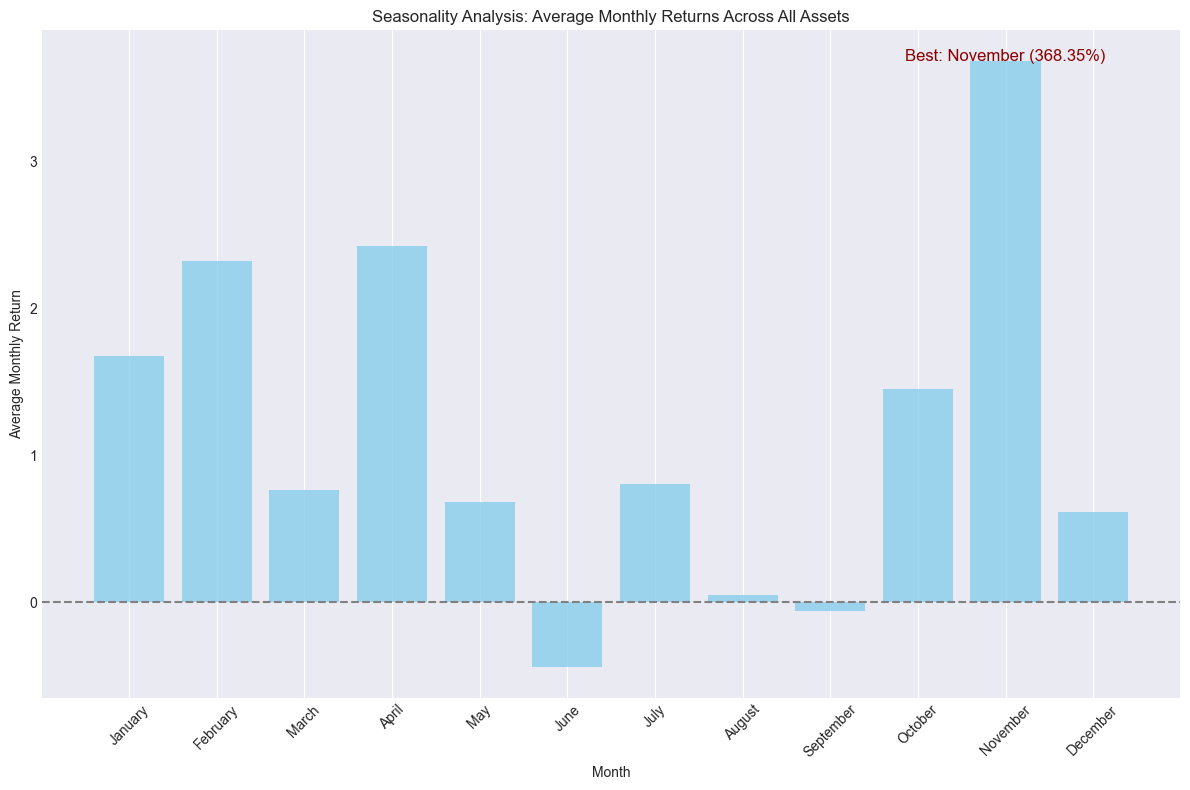

The best-performing month is November with an average return of 368.35%.


In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Add time-based features
combined_data['month'] = combined_data['date'].dt.month

# Step 2: Calculate monthly returns for each asset
monthly_returns = combined_data.groupby(['ticker', 'month'])['daily_return'].apply(
    lambda x: np.prod(1 + x) - 1
).reset_index(name='monthly_return')

# Step 3: Aggregate monthly returns across all assets
average_monthly_returns = monthly_returns.groupby('month')['monthly_return'].mean().reset_index()

# Map month numbers to month names for readability
average_monthly_returns['month_name'] = average_monthly_returns['month'].apply(
    lambda x: pd.to_datetime(f"2023-{x}-01").strftime('%B')
)

# Step 4: Identify the best-performing month
best_month = average_monthly_returns.loc[average_monthly_returns['monthly_return'].idxmax()]

# Step 5: Plot average monthly returns for all assets
plt.figure(figsize=(12, 8))
plt.bar(
    average_monthly_returns['month_name'], 
    average_monthly_returns['monthly_return'], 
    color='skyblue', alpha=0.8
)
plt.axhline(y=0, color='gray', linestyle='--')  # Add a line for zero
plt.text(
    best_month['month_name'], 
    best_month['monthly_return'], 
    f"Best: {best_month['month_name']} ({best_month['monthly_return']:.2%})", 
    color='darkred', fontsize=12, ha='center'
)
plt.xlabel('Month')
plt.ylabel('Average Monthly Return')
plt.title('Seasonality Analysis: Average Monthly Returns Across All Assets')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Step 6: Display the best month for reference
print(f"The best-performing month is {best_month['month_name']} with an average return of {best_month['monthly_return']:.2%}.")
